Първо трябва да се инсталират библиотеките, с които ще работим


In [345]:
pip install pandas matplotlib beautifulsoup4 requests

34196.33s - pydevd: Sending message related to process being replaced timed-out after 5 seconds

[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


За целите на проекта са използвани главно 3 библиотеки:
- pandas за работа с данните
- matplotlib за чертаене на графики
- difflib - за сравняване на стрингове


Използват се и библиотеките beautifulsoup4 и requests за уеб скрейпинг на имената на покемоните на различни езици

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher

# ЧАСТ 1: Data preprocessing - 1 точка
Една от най-подценяваните стъпки в анализа на данни е предварителното
разчистване на данните. Статистиката се основава най-често на данни, които
се съгласуват с нашите тези. Това може да звучи малко странно и “нагласено”,
но аномалии в данните изкривяват представата за общата оценка на дадена
популация. Независимо дали данните събирате лично вие, или получавате
готово множество от данни, трябва да приравним данните към общ стандарт.

Първата стъпка от разчистването на данните е тяхното прочитане от csv файла "Pokemon_full_2.csv", който трябва да се намира в същата директория, като notebook-a. Прочитането на данните, както и работата с тях се случва чрез библиотеката "pandas".

In [347]:
# import data from "Pokemon_full_2.csv" into pandas dataframe
# keep_default_na=False, na_values=[""] - treat only empty strings as NaN, otherwise the "None" values will be treated as NaN too
pokedf = pd.read_csv('./Pokemon_full_2.csv', keep_default_na=False, na_values=[""])

# display the pokedf dataframe
pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


### Задача 5: Премахване на празни данни (0.2 точки)
В някои случаи провеждащите проучването лица оставят отговарящите да не
попълнят някои въпроси и това оставя празни места. Тези празни места могат
да попречат на проучването ни. Елиминирайте всички редове, които имат
празни места в някоя колона. ВНИМАНИЕ: NONE НЕ Е ЗНАК ЗА ПРАЗНА
КОЛОНА.

In [348]:
# drop the rows with NaN values - these are the rows with empty strings
# inplace=True - modify the dataframe in place
pokedf.dropna(inplace=True)

# display the pokedf dataframe 
pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,None,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,None,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,None,92.0,130.0,115.0,80.0,115.0,138.0


### Задача 3: Стандартизиране на главни и малки букви (0.2 точки)
За да не оставите програмата да класифицира МЕСО и месо като различни
продукти, важно е да стандартизирате формата на текста. Стандартизирайте
категорийните променливи в избран от вас формат.

Освен стандартизирането на главните и малките букви, тук числовите полета биват означени като такива, за да не бъдат третирани като стрингове в по-късните задачи

In [349]:
# apply lambda function to the dataframe to convert all string values to lowercase
pokedf = pokedf.apply(lambda x: x.astype(str).str.lower())

# get the columns of the dataframe
cols = list(pokedf.columns)
# get the numeric columns of the dataframe, their indexes are 1,2,5,6,7,8,9,10
numeric_cols = cols[1:3] + cols[5:]
# convert the numeric columns to numeric type with another lambda function
pokedf[numeric_cols] = pokedf[numeric_cols].apply(pd.to_numeric)

### Задача 2: Премахване на технически грешки в данните (0.2 точки)
Ако знаете, че Гошо яде или мусака, или сарми за обяд, как ще реагирате,
когато вашата програма ви покаже, че той яде и мосака, и сърнди? Очевидно
това са правописни грешки. Във файла, pokemon_stats.csv, ще видите, че
типовете на покемоните имат някои грешки. Задачата е да ги поправите. Ако не
сте запознати с типовете на покемоните, използвайте Гугъл.

При поправката на типовете, се сравнява процентът на съвпадение, между типът в dataset-а и листът "types". Ако най-големият процент на съвпадение е под 50%, редът се маха.

In [350]:
# CORRECTION OF TYPES

# define a list of all types
types = (
    'normal',
    'fire',
    'water',
    'fighting',
    'flying',
    'grass',
    'poison',
    'electric',
    'ground',
    'psychic',
    'rock',
    'ice',
    'bug',
    'dragon',
    'ghost',
    'dark',
    'steel',
    'fairy',
    '???',
    'none'
)

# define a function that returns a list of ratios of the given value to all types
def get_type_ratios(value: str):
    # here we use the SequenceMatcher class from the difflib module to calculate the ratio of the given value to each type in percentage
    return [ SequenceMatcher(None, value, t).ratio() for t in types ]

# define a function that returns the type with the highest ratio
def correct_type(row: pd.Series, column: str):
    # get the ratios of the given value to all types
    ratios = get_type_ratios(row[column])

    # if the highest ratio is less than 0.5, we cannot determine the type, so we drop the row
    if max(ratios) < 0.5:
        print(f'Could not find type for {row[column]}')
        pokedf.drop(index=index, inplace=True)
        # return None to indicate that we could not determine the type
        return None

    # return the type with the highest ratio
    return types[ratios.index(max(ratios))]

# iterate over the rows of the dataframe
for index, row in pokedf.iterrows():
    # for each row, iterate over the columns "type" and "secundary type"
    for col in ('type', 'secundary type'):
        # if the value of the column is not in the list of types, we try to correct it
        if row[col] not in types:
            correct = correct_type(row, col)
            # if we could not determine the type, we continue to the next row
            if correct is None:
                continue
            row[col] = correct
    
# display the pokedf dataframe
pokedf

Could not find type for snake
Could not find type for gooff


,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,fushigisou,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
2,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,none,39.0,52.0,43.0,60.0,50.0,65.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,none,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,none,92.0,130.0,115.0,80.0,115.0,138.0


### Задача 4: Превод на данните (0.2 точки)
Понякога ни се налага да правим превод от един език на друг. В dataset-a ще
видите, че някои имена на покемони са на чужд език. Преведете ги на
английски, използвайки някой известен ресурс за покемони (например
bulbapedia).

Преди да заменим данните в DataFrame-а, трябва да вземем имената на покемоните на други езици от интернет, за да можем да разберем кои не са на английски. Това го постигаме чрез BеаutifulSoup4 библиотеката за уеб скрейпинг, като данните взимаме от този url: https://www.pokewiki.de/Pokémon-Liste.

In [351]:
import requests
from bs4 import BeautifulSoup
import csv

# Set the URL of the page to scrape
url = "https://www.pokewiki.de/Pokémon-Liste"

# Send a GET request to the URL and get the page content
response = requests.get(url)
content = response.content

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(content, "html.parser")

# Find the table element containing the Pokemon data
table = soup.find("table")

headers = ["number","german","english","french","japanese","korean","chinese"]
rows = []
for tr in table.find_all("tr")[1:]:
    # to get the english transcription of the japanese names, we need to get the text of the <rt> tag inside the <ruby> tag inside the <span> tag inside the <td> tag
    rows.append([td.text.strip() if td.span is None or td.span.ruby is None else td.span.ruby.rt.text.strip() for td in tr.find_all("td")])

# Remove the empty strings from the rows
rows = [ [elem.replace(" ", "-").replace("♀", "-female").replace("♂", "-male").replace("’", "").replace(".", "").replace("?","").lower() for elem in row[:-1] if elem != ''] for row in rows ]

# Write the data to a CSV file
filename = "pokemon_data.csv"
with open(filename, "w", newline="", encoding="utf-8") as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(rows)

print(f"Pokemon data saved to {filename}")

Pokemon data saved to pokemon_data.csv


За да се направи преводът на английски, използваме файлът pokemon_data.csv, получен от предходната клетка с код. Прочитаме съдържанието на файла и го зареждаме в DataFrame. Оттам проверяваме за всеки покемон дали името му е в колоната с английските имена. Ако не е там, проверяваме дали не е в някоя от колоните с другите езици.

In [352]:
# import the data from the CSV file into a pandas dataframe
languagedf = pd.read_csv('./pokemon_data.csv')

# define a list of all languages that we have translations for
languages = (
    'german',
    'french',
    'japanese',
    'chinese',
    'korean'    
)

# define a function that returns the english name of a pokemon
def correct_name(name: str):
    # if the name is not in the english column, we try to find it in the other columns
    if name not in languagedf['english'].values:
        # iterate over the languages
        for lang in languages:
            # if the name is in the current language column, we return the english name
            if name in languagedf[lang].values:
                return languagedf[languagedf[lang] == name]['english'].values[0]

    # if the name is in the english column, we return it
    return name

for name in pokedf['name']:
    # for each name in the dataframe, we try to correct it
    new_name = correct_name(name)
    
    # # if we found the name, we replace the old name with the new name
    pokedf.loc[pokedf['name'] == name, 'name'] = new_name

### Задача 1: Премахване на дублирани данни (0.2 точки)
Какво ще стане, ако запишем, че Гошо е ял мусака в 12:20 3 пъти? Ще
направим грешно заключение, че Гошо яде много мусака. За да избегнем това,
трябва да изчистим дублираните данни. Вашата задача е да изчистите файла
pokemon_stats.csv от дублирани данни и да предоставите кода, чрез който сте
го направили.

In [353]:
# drop dulicate in the pokedf dataframe, keep the first occurence and apply the changes to the dataframe in place
pokedf.drop_duplicates(subset=['name'], keep='first', inplace=True)

# display the pokedf dataframe
pokedf

,name,height,weight,type,secundary type,hp,attack,defense,sp atk,sp def,speed
0,bulbasaur,7.0,69.0,grass,poison,45.0,49.0,49.0,65.0,65.0,45.0
1,ivysaur,10.0,130.0,grass,poison,60.0,62.0,63.0,80.0,80.0,60.0
3,venusaur,20.0,1000.0,grass,poison,80.0,82.0,83.0,100.0,100.0,80.0
4,charmander,6.0,85.0,fire,none,39.0,52.0,43.0,60.0,50.0,65.0
5,charmeleon,11.0,190.0,fire,none,58.0,64.0,58.0,80.0,65.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...
894,drakloak,14.0,110.0,dragon,ghost,68.0,80.0,50.0,60.0,50.0,102.0
895,dragapult,30.0,500.0,dragon,ghost,88.0,120.0,75.0,100.0,75.0,142.0
896,zacian,28.0,1100.0,fairy,none,92.0,130.0,115.0,80.0,115.0,138.0
897,zamazenta,29.0,2100.0,fighting,none,92.0,130.0,115.0,80.0,115.0,138.0


# ЧАСТ 2: Анализ на категорийните променливи - 1.25 точки
Обикновено с този тип променливи правим “честотен анализ”. Това означава да
разберем какъв е процентът на срещане на даден текст. Често ще виждате, че
текстът е един от няколко варианта, тоест не става въпрос за анализ на
свободен текст, а на някаква категория (това в машинното самообучение е
познато и като “класификация”).

### Задача 6: Кой е най-често срещаният тип? (0.1 точки)

За да пресметнем най-често срещаният тип, взимаме броят на покемоните, които имат даденият тип като първичен и вторичен. Няма нужда да се притесняваме, че даден покемон ще бъде преброен 2 пъти, понеже няма такива с еднакъм първичен и вторичен тип.

In [354]:
# get the number of pokemon of each type and secundary type into dictionaries
type = pokedf['type'].value_counts().to_dict()
secundary_type = pokedf['secundary type'].value_counts().to_dict()
# remove the 'none' key from the secundary_type dictionary
secundary_type.pop('none')

# add the number of pokemon of each type and secundary type to a new dictionary
type_count = { t: type.get(t, 0) + secundary_type.get(t, 0) for t in set(type) | set(secundary_type) }

# get the type with the highest number of pokemon
maxType = max(type_count, key=type_count.get)

# print the type with the highest number of pokemon
print ('most common type is: ' + maxType + ' with ' + str(type_count[maxType]) + ' pokemon')

# create a dictionary that maps each main type to the number of pokemon of that type
print ('most common main type is: ' + pokedf['type'].mode()[0])

most common type is: water with 141 pokemon
most common main type is: water


### Задача 7: Колко покемона са от тип Poison? (0.1 точки)

За да се намери колко покемона са от тип отрова се сумира броят на покемони с такъв вторичен или първичен тип. Както бе споменато по-рано, няма покемони с еднакви първични и вторични типове, затова и не се правят проверки дали даден покемон се повтаря.

In [355]:
# how many pokemon are of type poison
poisonPoke = pokedf['type'].value_counts()['poison'] + pokedf['secundary type'].value_counts()['poison']

print (str(poisonPoke) + ' pokemon have poison as either their first or secondary type')

print (str(pokedf['type'].value_counts()['poison']) + ' pokemon have poison as their main type')

69 pokemon have poison as either their first or secondary type
35 pokemon have poison as their main type


### Задача 8: В една игра обикновено има starter pokemon-и, които са от тип Fire, Grass или Water. Нека да предположим, че всеки покемон от тези типове може да е starter (дори и еволюциите). Какъв е шансът, ако изберем Water, той да е и Poison? (0.35 точки)
Задачата решаваме чрез класическа вероятност. Ако не сте запознати какво е
това, моля, потърсете информация в Интернет.

За да получим отговорът на тази задача трябва да разделим броят на покемони, чийто типове (без значение дали първичен или вторичен) са вода и отрова, на броя на покемоните, които имат тип вода.

In [356]:
# how many pokemon are of type poison and water
pwarr = pokedf[((pokedf['type'] == 'water') & (pokedf['secundary type'] == 'poison')) | ((pokedf['type'] == 'poison') & (pokedf['secundary type'] == 'water'))]
# how many pokemon are of type water
warr = pokedf[(pokedf['type'] == 'water') | (pokedf['secundary type'] == 'water')]

# devide the number of pokemon that are poison and water by the number of pokemon that are water
# this gives us the chance of a water pokemon being poison type
print (str(100*len(pwarr)/len(warr)) + '% is the chance of a water pokemon being poison type')


4.25531914893617% is the chance of a water pokemon being poison type


### Задача 9: Направете хистограма на първичните типове. Какви заключения можем да направим по нея? (0.35 точки)
За целта разгледайте matplotlib библиотеката и какво наричаме хистограма.

Most common main type is: water


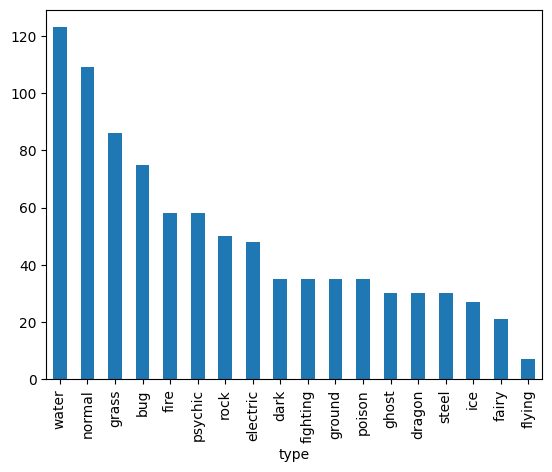

In [357]:
# plot the number of pokemon of each type
main_types = pokedf['type'].value_counts()
main_types.plot.bar()
print ('Most common main type is: ' + main_types.index[0])

От таблицата може да видим и сравним, броевете на покемоните от съответните първични типове. Най-много са водните, а най-малко летящите покемони.


### Задача 10: Направете хистограма на вторичните типове. Кой е най-често срещаният вторичен тип? (0.35 точки)

Most common secondary type is none


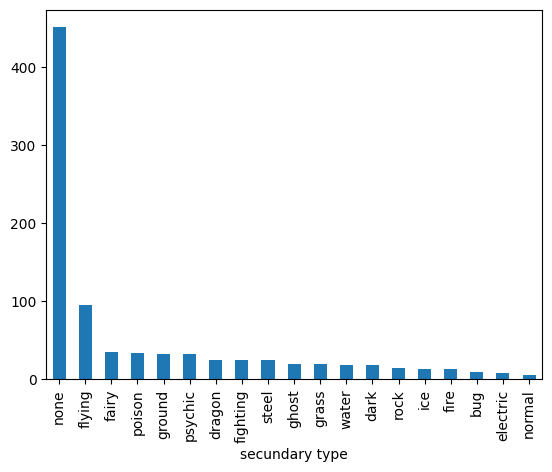

In [358]:
secondary_types = pokedf['secundary type'].value_counts()

# omit the pokemon without a secondary type, as they are the most common
# secondary_types = secondary_types.drop(labels=main_types.index[0])

secondary_types.plot.bar()
print ("Most common secondary type is " + secondary_types.index[0])

Най-много имаме покемони, които нямат вторичен тип. Втори по бройка са тези с тип "flying", а най-малко са "normal" покемоните.

# ЧАСТ 3: Анализ на числовите променливи - 1.75 точки
Числовите променливи ни дават шанса да направим някои по-интересни
заключения. На някои от тези въпроси можем да отговорим, след като
приложим някакъв вид регресия. За целта, напишете по изучените методи
имплементация на линейна регресия.

### Задача 10: Какво е средноаритметичното на атаката на покемоните? (0.1 точки)

In [359]:
# get the mean attack value
meanAtk = pokedf['attack'].mean()

print ("The mean attack value is " + str(meanAtk))

The mean attack value is 76.29932735426009


### Задача 11: Покажете таблица на средноаритметичните на всички числови променливи. (0.2 точки)

In [360]:
# get the numeric columns of the dataframe
temp = pokedf[cols[1:3] + cols[5:]]

# create a dataframe with the mean of each column for better readability
mean_df = pd.DataFrame(temp.mean(), columns=['mean'])
mean_df

,mean
height,11.838565
weight,628.883408
hp,68.770179
attack,76.299327
defense,71.854260
sp atk,69.652466
sp def,69.946188
speed,65.695067


### Задача 12: Съвпада ли модата със средноаритметичното при всички числови променливи? (0.3 точки)

In [361]:
# get columns
temp = pokedf[cols[1:3] + cols[5:]]

# create a dataframe with the mode of each column for better readability
cdf = pd.concat([temp.mean(), temp.mode().iloc[0], (temp.mean() == temp.mode().iloc[0])], axis=1)
cdf.columns = ['mean', 'mode', 'mean == mode']

cdf

,mean,mode,mean == mode
height,11.838565,6.0,False
weight,628.883408,10.0,False
hp,68.770179,60.0,False
attack,76.299327,60.0,False
defense,71.854260,50.0,False
sp atk,69.652466,40.0,False
sp def,69.946188,50.0,False
speed,65.695067,50.0,False


За нито една от колоните няма съвпадение между мода и средноаритметично.

### Имплементация на градиентно спускане

За имплементирането на градиентното спускане се използва производната на сумата от грешките - J(w,b). Чрез нея, умножена по learning rate-a и извадена от предходната стойност на съответно w или b, получаваме следващата стойност на w и b. Този процес се повтаря за броя зададени итерации.

In [362]:
# define a function to calculate gradient descent
def gradient_descent(x, y, learning_rate, num_iterations):
    # initialize slope and intercept with 0
    slope = 0
    intercept = 0

    # get the number of data points
    data_num = len(x)

    # for each iteration we calculate the predicted y values, the derivatives and update the slope and intercept
    for i in range(num_iterations):
        # calculate the predicted y values
        y_predicted = slope * x + intercept

        # calculate the derivative of J(w,b) with respect to w (sd) and b (id)
        sd = (-1 / data_num) * sum(x * (y - y_predicted))
        id = (-1 / data_num) * sum(y - y_predicted)

        # update the slope and intercept
        slope = slope - learning_rate * sd
        intercept = intercept - learning_rate * id

    # return the slope and intercept
    return slope, intercept

### Задача 13: Предвидете колко висок би бил един покемон, ако има 85 атака. (0.5 точки)

Чрез функцията за градиентно спускане намираме slope (w) и intercept (b). Чрез matplotlib се създава scatter plot, върху който се визуализира функцията на най-доброто съвпадение, както и точката на предвидената височина.

Slope: 0.15547111254899676 Intercept: -0.0005647419891981331
Predicted height: 13.214479824675527


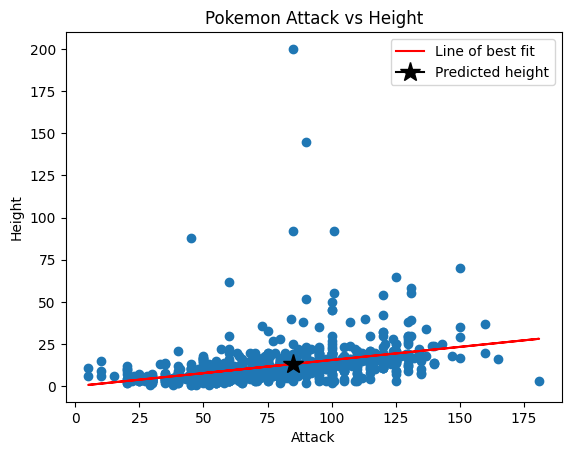

In [365]:
# get the attack and height values
x = temp['attack']
y = temp['height']

# calculate the slope and intercept
slope, intercept = gradient_descent(x, y, 0.0001, 1000)

# print the slope and intercept
print("Slope: " + str(slope), "Intercept: " + str(intercept))

# define a function to predict the height of a pokemon based on its attack
def predict(x):
    return slope * x + intercept


# set title of the graph
plt.title("Pokemon Attack vs Height")

# set labels for the x and y axis
plt.xlabel("Attack")
plt.ylabel("Height")

# plot the line of best fit, the predicted height and the data points
plt.plot(x, predict(x), color='red')

# plot the predicted height for an attack of 85
plt.plot(85, predict(85), marker='*', markersize=15, color='black')

# plot the data points
plt.legend(['Line of best fit', 'Predicted height'])
print("Predicted height: " + str(predict(85)))

# plot the data points
plt.scatter(x, y)
plt.show()

### Задача 14: Направете анализ на теглото на покемона спрямо неговия special defense. (0.65 точки)

Отново чрез градиентно спускане намираме функцията на най-добро съвпадение, която чертаем върху scatter plot с данните.

Slope: 9.360014959040655 Intercept: -2.2552794985582665


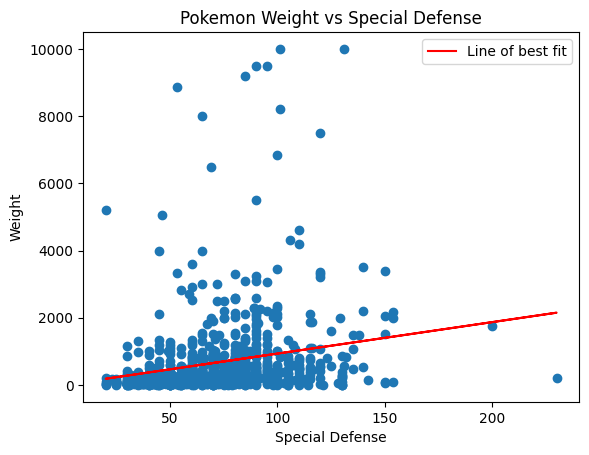

In [364]:
# get special defense and weight values
x = pokedf["sp def"]
y = pokedf["weight"]

# calculate the slope and intercept
slope, intercept = gradient_descent(x, y, 0.0001, 1000)

# print the slope and intercept
print("Slope: " + str(slope), "Intercept: " + str(intercept))

# set title of the graph
plt.title("Pokemon Weight vs Special Defense")

# set labels for the x and y axis
plt.xlabel("Special Defense")
plt.ylabel("Weight")

# plot the line of best fit and the data points
plt.plot(x, slope * x + intercept, color='red')

# set the legend
plt.legend(["Line of best fit"])

# plot the data points
plt.scatter(x, y)
plt.show()